In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import time
from collections import deque 

## Variable Global

In [2]:
matrizDistancias = []
tiempo = 0

## Funciones Auxiliares Comunes

In [3]:
# Dado un String, Lee el archivo correspondiente
def leeArchivo(archivo):
    f = open("tsp/" + archivo)
    x = []
    y = []
    cont = 0;
    for linea in f:
        cont += 1
        sp = linea.split(" ")
        if cont > 6 and sp[0] != "EOF\n":
            i = -2
            xp = sp[i]
            while xp == "":
                i -= 1
                xp = sp[i]
            yp = sp[-1].split("\n")
            x.append(float(xp))
            y.append(float(yp[0]))  
    return x,y

In [4]:
# Calcula la distancia entre dos puntos (x,y) - (x2,y2)
def calculaDistancia(x, y, x2, y2):
    xd = x - x2
    yd = y - y2
    return round(math.sqrt(xd*xd + yd*yd))

In [5]:
# Pinta todos los puntos recibiendo una lista de puntos x e y
def pintaMapa(x,y):
    plt.figure(figsize=(15, 8))
    plt.scatter(x,y)
    plt.show()

In [6]:
# Dado un vector de resultado, pinta el resultado de este vector sobre los puntos
def pintaCamino(v,x,y,coste):
    plt.figure(figsize=(15, 8))
    xc = []
    yc = []
    for i in v:
            xc.append(x[i])
            yc.append(y[i])
    
    xc.append(x[v[0]])
    yc.append(y[v[0]])
    
    plt.plot(xc,yc,"y")
    plt.scatter(x,y, c = "black")
    plt.scatter(xc[0],yc[0],c="green")
    plt.scatter(xc[-2],yc[-2],c="red")
    
    plt.suptitle("Mejor camino con coste " + str(coste),fontsize=20)
    
    plt.show()    

In [7]:
# Calcula matriz de distancias
def calculaMatrizDistancias(x,y):
    global matrizDistancias 
    matrizDistancias = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            matrizDistancias[i,j] = calculaDistancia(x[i],y[i],x[j],y[j])

In [8]:
# Calcula Coste del vector Solucion
def calculaCoste(vResultado):
    kms = 0;
    for i in range(1,len(vResultado)):
            kms += matrizDistancias[vResultado[i-1]][vResultado[i]]
    kms += matrizDistancias[vResultado[-1]][vResultado[0]]
    return kms

In [9]:
# Calcula Coste Vecino
def calculaCosteVecino(costeSolAntigua, sAntigua, sActual, i1, i2):
    if i1 + 1 > len(sActual) - 1:
        piv1 = 0
    else:
        piv1 = i1 + 1
    
    if i2 + 1 > len(sActual) - 1:
        piv = 0
    else:
        piv = i2 + 1
    
    
    coste = costeSolAntigua - matrizDistancias[sAntigua[i1 - 1]][sAntigua[i1]] - matrizDistancias[sAntigua[ piv1]][sAntigua[i1]]
    coste = coste - matrizDistancias[sAntigua[i2 - 1]][sAntigua[i2]] - matrizDistancias[sAntigua[piv]][sAntigua[i2]]
    coste = coste + matrizDistancias[sActual[i1 - 1]][sActual[i1]] + matrizDistancias[sActual[ piv1]][sActual[i1]]
    coste = coste + matrizDistancias[sActual[i2 - 1]][sActual[i2]] + matrizDistancias[sActual[piv]][sActual[i2]]
    return coste

In [10]:
# Genera solucion aleatoria
def solucionAleatoria(tam, num):
    vResult = list(range(0,tam))
    random.seed(num)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [11]:
# Tic
def tic():
    global tiempo 
    tiempo = time.time()

In [12]:
# Toc
def toc():
    global tiempo 
    return  (time.time() - tiempo)

In [13]:
def representaResultados(analisisResultado):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste","Numero Evaluaciones", "Tiempo"])
    for i in range(0,10):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3]]
        
    display(tablaFinal)
    print("Media coste: ", tablaFinal[["Coste"]].mean()[0])
    print("Desviación típica coste: ", tablaFinal[["Coste"]].std()[0])
    print("Media numero de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].mean()[0])
    print("Desviación típica de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].std()[0])
    print("Media tiempo: ", tablaFinal[["Tiempo"]].mean()[0])

# Fichero a Analizar

In [14]:
x, y = leeArchivo("st70.tsp")
# x, y = leeArchivo("ch130.tsp")
# x, y = leeArchivo("a280.tsp")
# x, y = leeArchivo("p654.tsp")
# x, y = leeArchivo("vm1084.tsp")
# x, y = leeArchivo("vm1748.tsp")
calculaMatrizDistancias(x,y)

# Algoritmo Greedy

In [15]:
# Algoritmo Greedy
def greedy(x,y,mostrar):
    tic()
    vResultado = [];
    nodosNoVisitados = list(range(0,len(x)))
    i = 0;
    vResultado.append(nodosNoVisitados[i])
    del nodosNoVisitados[i]
    while i < len(x) and nodosNoVisitados != []:
        nodoActual = vResultado[-1]
        ordenad = np.sort(matrizDistancias[nodoActual,:])
        k = 0
        encontrado = False
        while k < len(y) and encontrado == False:      
            minimo = np.where(ordenad[k] == matrizDistancias[nodoActual,:])
            max = len(minimo[0])
            z = 0
            while z < max and encontrado == False:
                if (minimo[0][z] in vResultado):
                    k += 1
                    z += 1
                else:
                    encontrado = True
        vResultado.append(minimo[0][z])
        nodosNoVisitados.remove(minimo[0][z])
        i += 1
    km = calculaCoste(vResultado)
    t = toc()
    # pintaMapa(x,y)
    if mostrar == "s":
        print("Tiempo de ejecucion = " + str(t))
        pintaCamino(vResultado,x,y, km)
    return vResultado, km

Tiempo de ejecucion = 0.003988504409790039


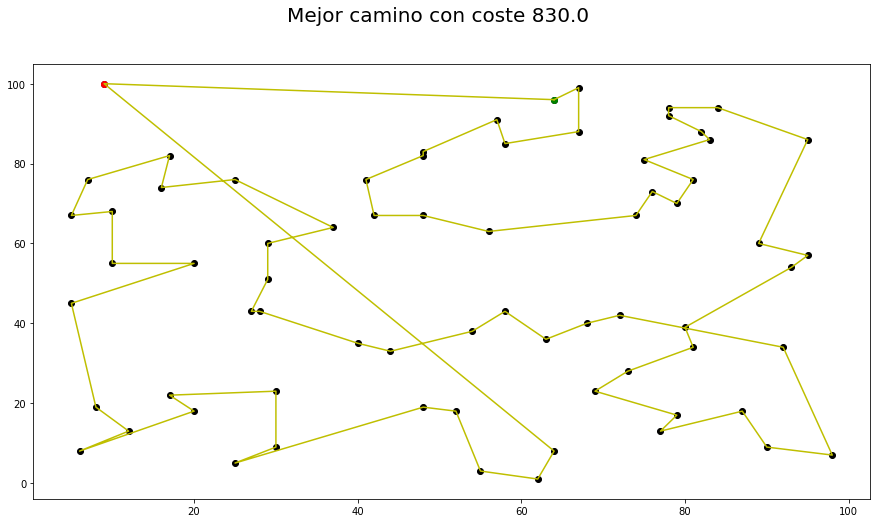

In [16]:
# Greedy
resultado, km = greedy(x, y,"s")

# Busqueda Aleatoria

In [17]:
# Algoritmo Busqueda Aleatoria
def busquedaAleatoria(x,y):
    tam = len(x)
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        mejorCoste = float("inf")
        mejor = [];
        random.seed(z)
        for j in range(0,1600*tam):
            vResult = list(range(0,tam))
            for i in range(0,tam):
                rnd = random.randint(0,tam-1)
                vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
            coste = calculaCoste(vResult)
            if coste < mejorCoste:
                mejor = vResult.copy()
                mejorCoste = coste

        if mejorCoste < costeFinal:
            costeFinal = mejorCoste
            mejorCam = mejor.copy()
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(mejorCoste)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Tiempo
0,0.0,2868.0,12.455060
1,1.0,2770.0,11.791702
2,2.0,2809.0,12.682920
3,3.0,2875.0,12.272067
4,4.0,2842.0,12.527777
5,5.0,2812.0,12.137244
6,6.0,2780.0,13.096923
7,7.0,2850.0,13.210920
8,8.0,2806.0,13.529210
9,9.0,2823.0,14.171148


Media coste:  2823.5
Desviación típica coste:  35.08798464811946


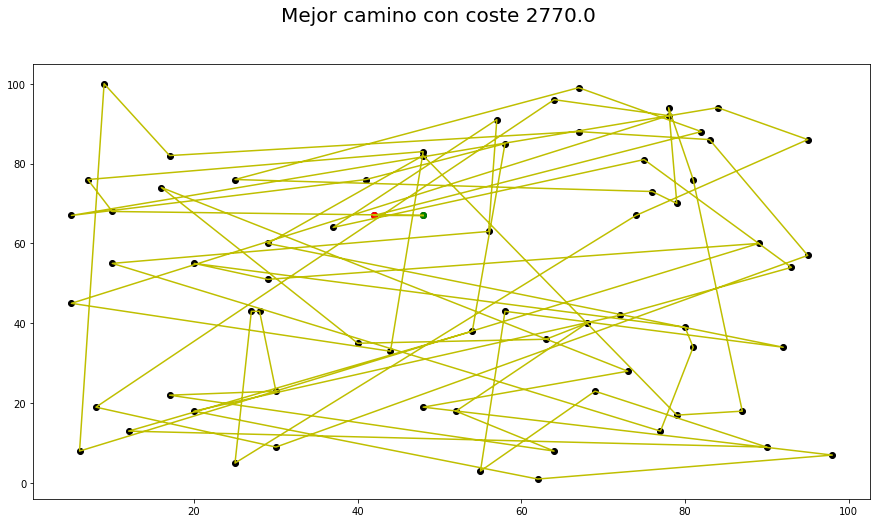

In [33]:
# Busqueda Aleatoria
busquedaAleatoria(x, y)

# Busquedas Locales

## Busqueda Local El Mejor

In [18]:
# Devuelve el mejor vecino
def mejorVecino(w, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste.copy()
    for i in range(0, len(w)):
        for j in range(i + 1,len(w)):
            w2 = w.copy();
            w2[i], w2[j] = w2[j], w2[i]
            coste = calculaCosteVecino(costeSolAntigua, w, w2, i, j)
            if coste < mejorCoste :
                mejor = w2
                mejorCoste = coste
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
    return mejor, mejorCoste, sumador

In [19]:
# Algoritmo Busqueda Local El Mejor
def busquedaLocalElMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = mejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,1189.0,112000.0,0.518645
1,1.0,1267.0,112000.0,0.497759
2,2.0,1144.0,112000.0,0.483885
3,3.0,1266.0,112000.0,0.497672
4,4.0,1270.0,112000.0,0.493677
5,5.0,1358.0,112000.0,0.479722
6,6.0,1204.0,112000.0,0.486846
7,7.0,1104.0,112000.0,0.497636
8,8.0,1161.0,112000.0,0.472769
9,9.0,1305.0,112000.0,0.504797


Media coste:  1226.8
Desviación típica coste:  79.27560925166216
Media numero de evaluaciones:  112000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  0.4933407068252563


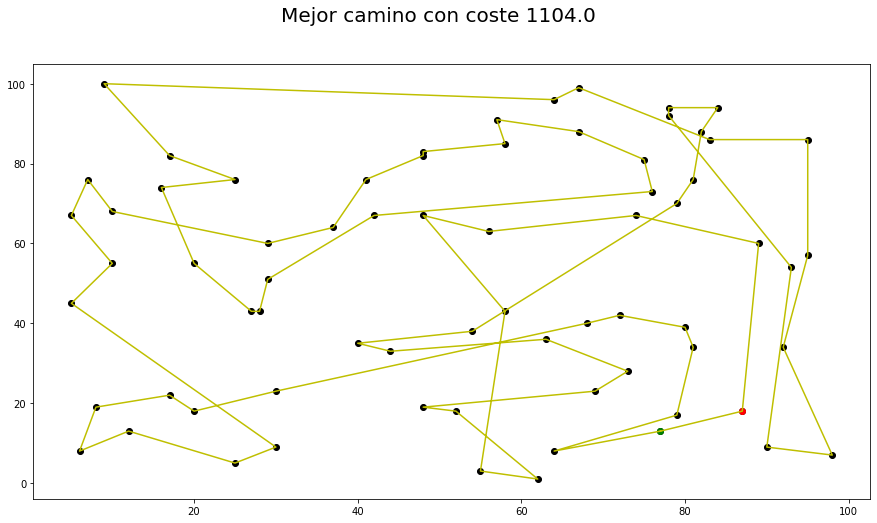

In [20]:
# Busqueda Local El Mejor
busquedaLocalElMejor(x, y)

## Busqueda Local El Primer Mejor

In [21]:
# Devuelve el primer mejor vecino
def primerMejorVecino(w, sumador, maximo):
    actual = w;
    actualCoste = calculaCoste(w)
    i = 0
    encontrado = False
    while i < len(w) and encontrado == False:
        j = i + 1
        while j < len(w) and encontrado == False:
            mejor = actual.copy()
            mejor[i], mejor[j] = mejor[j], mejor[i]
            coste = calculaCosteVecino(actualCoste, actual, mejor, i, j)
            if coste < actualCoste:
                encontrado = True
            else:
                j += 1
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
        i += 1
    if actualCoste == coste:
        mejor = w
        coste = actualCoste
    return mejor, coste, sumador

In [22]:
# Algoritmo Busqueda Local El Primer Mejor
def busquedaLocalElPrimerMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = primerMejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
                i += 1
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
        
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,1293.0,112000.0,0.609401
1,1.0,1148.0,61412.0,0.342084
2,2.0,1081.0,84250.0,0.505664
3,3.0,1058.0,81856.0,0.470778
4,4.0,1192.0,66207.0,0.316150
5,5.0,1026.0,86453.0,0.398900
6,6.0,973.0,98853.0,0.455321
7,7.0,1075.0,84283.0,0.402927
8,8.0,966.0,58654.0,0.274260
9,9.0,1069.0,67221.0,0.327132


Media coste:  1088.1
Desviación típica coste:  99.92936394162517
Media numero de evaluaciones:  80118.9
Desviación típica de evaluaciones:  17047.32602329305
Media tiempo:  0.4102617263793945


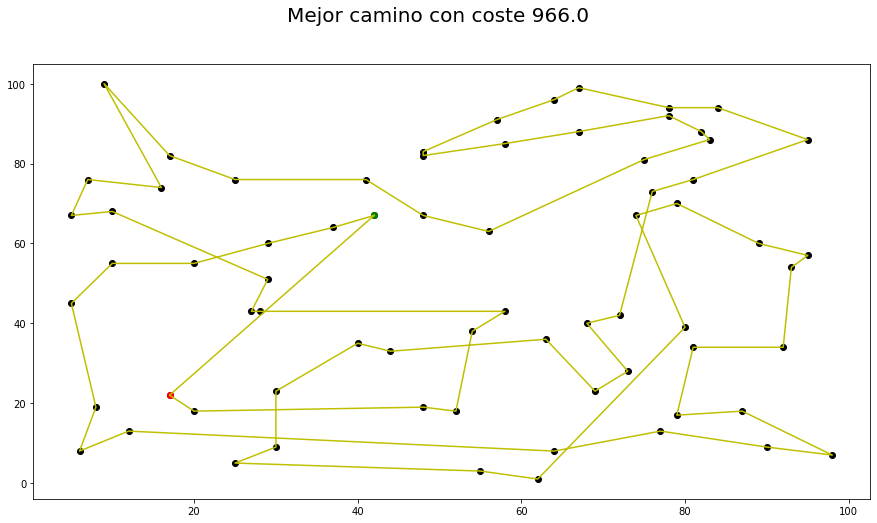

In [23]:
# Busqueda Local El Primero Mejor
busquedaLocalElPrimerMejor(x, y)

## Busqueda Local El Mejor Aleatorizado

In [24]:
# Devuelve el mejor vecino Aleatorizado
def mejorVecinoAleatorizado(w, numVecinos, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste
    for i in range(0, numVecinos):
        w2 = w.copy();
        rnd1 = random.randint(0,len(w) - 1)
        rnd2 = random.randint(0,len(w) - 1)
        w2[rnd1], w2[rnd2] = w2[rnd2], w2[rnd1]       
        coste = calculaCosteVecino(costeSolAntigua, w, w2, rnd1, rnd2)
        if coste < mejorCoste :
            mejor = w2
            mejorCoste = coste 
        if sumador >= maximo:
            break
        else :
            sumador +=1
    return mejor, mejorCoste, sumador

In [25]:
# Algoritmo Busqueda Local El Mejor Aleatorizado
def busquedaLocalElMejorAleatorizado(x,y,numVecinosLim, k):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        encontrado = False
        while i < maximo and encontrado == False:
            iterador = 0
            fueraBucle = False
            while iterador < k and fueraBucle == False:
                iterador += 1
                mejorV, mejorCost, i = mejorVecinoAleatorizado(w, numVecinosLim, i, maximo)  
                if mejorCost < costeActual or iterador > k:
                    fueraBucle = True
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,1383.0,4095.0,0.053845
1,1.0,1298.0,3920.0,0.040890
2,2.0,1273.0,4515.0,0.039893
3,3.0,1330.0,4480.0,0.033909
4,4.0,1440.0,3325.0,0.023936
5,5.0,1543.0,2695.0,0.020944
6,6.0,1628.0,2135.0,0.014960
7,7.0,1311.0,3430.0,0.024973
8,8.0,1390.0,4165.0,0.029913
9,9.0,1513.0,3185.0,0.022939


Media coste:  1410.9
Desviación típica coste:  118.01925454960492
Media numero de evaluaciones:  3594.5
Desviación típica de evaluaciones:  783.1540574994027
Media tiempo:  0.030620217323303223


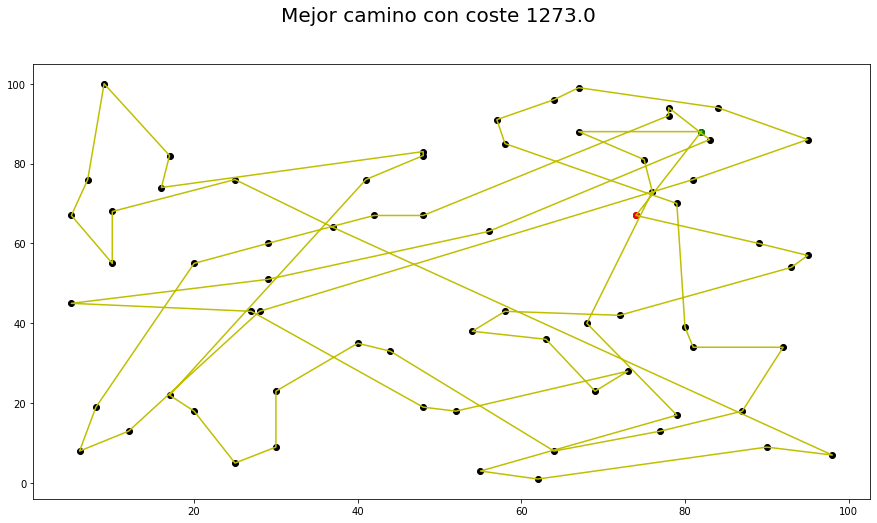

In [26]:
# Busqueda Local El Mejor Aleatorizado
numVecinosLim = round(len(x) / 2)
k = 5
busquedaLocalElMejorAleatorizado(x, y, numVecinosLim, k)

# Enfriamiento Simulado

In [27]:
# Selecciona candidatos
def seleccionaSolucion(sActual, coste):
    rnd1 = random.randint(0,len(sActual) - 1)
    rnd2 = random.randint(0,len(sActual) - 1)
    sCandidata = sActual.copy()
    sCandidata[rnd1], sCandidata[rnd2] = sCandidata[rnd2], sCandidata[rnd1]
    costeCandiata = calculaCosteVecino(coste, sActual, sCandidata, rnd1, rnd2)
    return sCandidata, costeCandiata

In [28]:
# Algoritmo de Enfriamiento Simulado
def enfriamientoSimuladoIteraciones(x, y, mu, phi, L):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual  
        numIteraciones = 80 * len(x)
        evaluaciones = 0
        resultado, km = greedy(x, y,"n")
        Tinicial = (mu /(- np.log(phi))) * km
        iterador = 0
        T = Tinicial
        while iterador < numIteraciones:
            for i in range(0,L):
                sCandidata, costeCandidata = seleccionaSolucion(sActual, costeActual)
                evaluaciones += 1
                delta = costeCandidata - costeActual
                exponente = (- delta) / T
                if (delta < 0) or (random.uniform(0, 1) < math.e**exponente):
                    sActual = sCandidata
                    costeActual = costeCandidata
                    if costeActual < costeBest:
                        sBest = sActual
                        costeBest = costeActual
            T = Tinicial / (1 + iterador)
            iterador += 1

        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(evaluaciones)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,1263.0,112000.0,0.968943
1,1.0,913.0,112000.0,1.148598
2,2.0,1081.0,112000.0,1.194477
3,3.0,941.0,112000.0,1.227839
4,4.0,1041.0,112000.0,1.238717
5,5.0,1109.0,112000.0,1.138953
6,6.0,1016.0,112000.0,0.949030
7,7.0,1030.0,112000.0,1.045177
8,8.0,900.0,112000.0,1.019275
9,9.0,1118.0,112000.0,0.938521


Media coste:  1041.2
Desviación típica coste:  109.77127736039758
Media numero de evaluaciones:  112000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  1.086953091621399


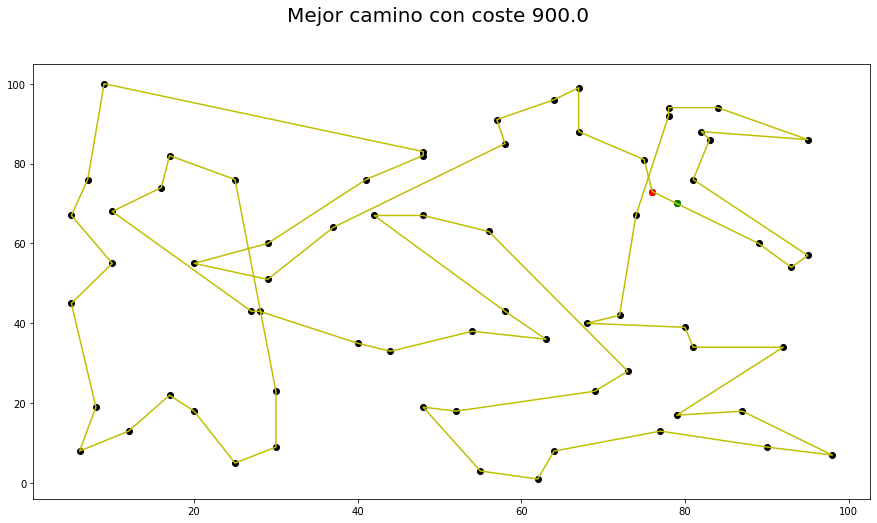

In [29]:
# Algoritmo de Enfriamiento Simulado
# Si el incremento el numero de vecinos (L) aumento la exploración y puedo conseguir llegar a un minimo
# Si el incremento es demasiado bajo, es un algoritmo muy parecido a la busqueda local del mejor aleatorizado
# Con alpha ( o metodo de enfriamiento) y L podemos variar la pendiente de la gráfica, es decir, explorar mas o menos
mu = 0.3
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,1081.0,112000.0,0.949489
1,1.0,985.0,112000.0,0.923530
2,2.0,918.0,112000.0,1.003443
3,3.0,1025.0,112000.0,0.980533
4,4.0,1122.0,112000.0,0.943779
5,5.0,1076.0,112000.0,0.906669
6,6.0,982.0,112000.0,0.892299
7,7.0,882.0,112000.0,1.062183
8,8.0,1020.0,112000.0,0.916645
9,9.0,1015.0,112000.0,0.887782


Media coste:  1010.6
Desviación típica coste:  73.4426458008031
Media numero de evaluaciones:  112000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  0.9466352224349975


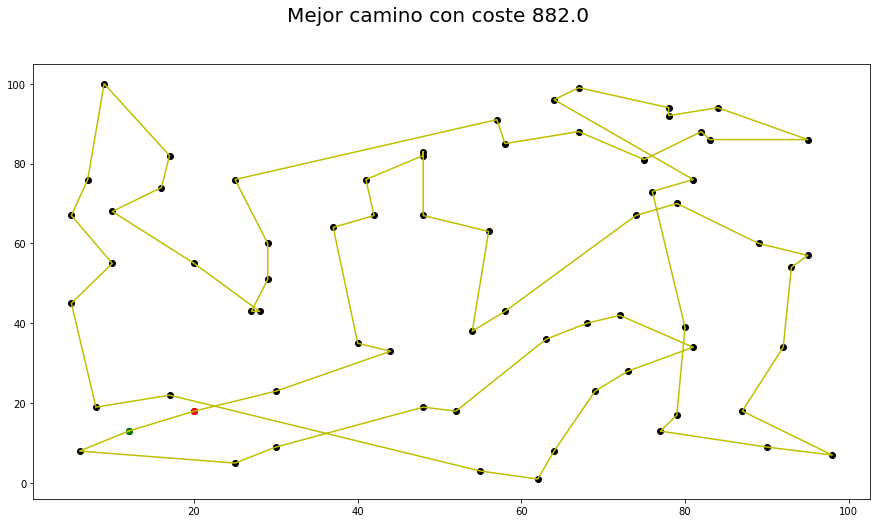

In [32]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,1034.0,112000.0,0.946483
1,1.0,909.0,112000.0,1.013291
2,2.0,1027.0,112000.0,0.948497
3,3.0,1004.0,112000.0,0.906579
4,4.0,1062.0,112000.0,0.977966
5,5.0,943.0,112000.0,0.884636
6,6.0,1024.0,112000.0,0.915698
7,7.0,1128.0,112000.0,0.886623
8,8.0,1049.0,112000.0,0.872812
9,9.0,1020.0,112000.0,0.859706


Media coste:  1020.0
Desviación típica coste:  60.586026991928314
Media numero de evaluaciones:  112000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  0.921229076385498


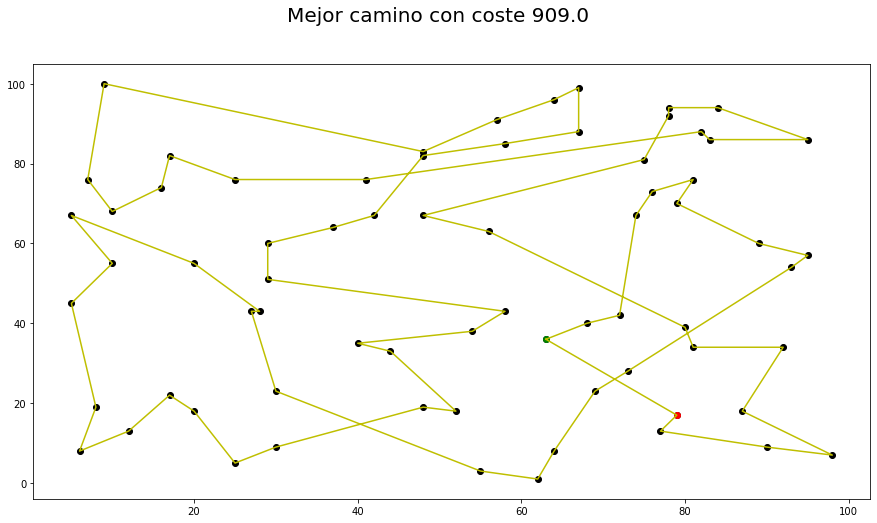

In [33]:
# Algoritmo de Enfriamiento Simulado
mu = 0.3
phi = 0.6
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,903.0,112000.0,1.019691
1,1.0,887.0,112000.0,0.913568
2,2.0,917.0,112000.0,0.917545
3,3.0,957.0,112000.0,0.864687
4,4.0,915.0,112000.0,0.849728
5,5.0,889.0,112000.0,0.901744
6,6.0,1012.0,112000.0,0.924496
7,7.0,988.0,112000.0,1.031274
8,8.0,1022.0,112000.0,0.975386
9,9.0,990.0,112000.0,0.898602


Media coste:  948.0
Desviación típica coste:  51.95510882803859
Media numero de evaluaciones:  112000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  0.9296721935272216


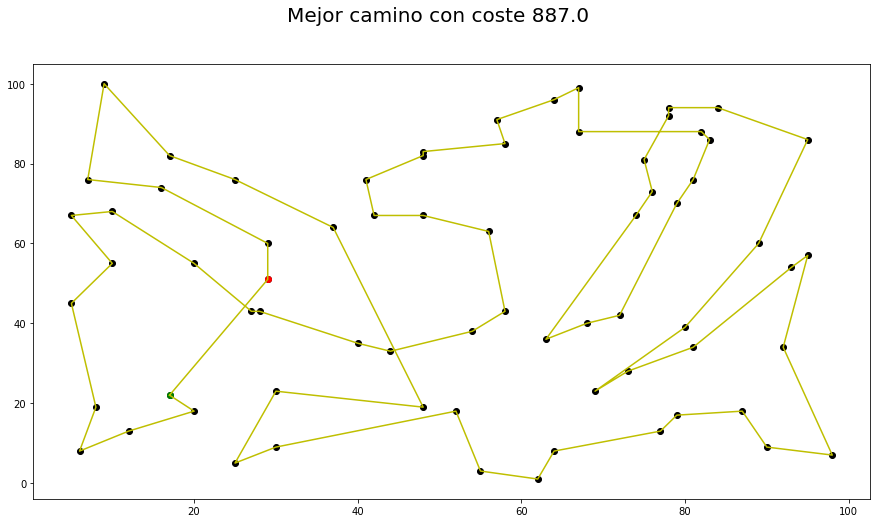

In [34]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.6
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,846.0,280000.0,2.259597
1,1.0,830.0,280000.0,2.225017
2,2.0,895.0,280000.0,2.434526
3,3.0,920.0,280000.0,2.373556
4,4.0,818.0,280000.0,2.392345
5,5.0,924.0,280000.0,2.292063
6,6.0,785.0,280000.0,2.456652
7,7.0,891.0,280000.0,2.631985
8,8.0,890.0,280000.0,2.558110
9,9.0,885.0,280000.0,2.247804


Media coste:  868.4
Desviación típica coste:  46.171660379741844
Media numero de evaluaciones:  280000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  2.387165570259094


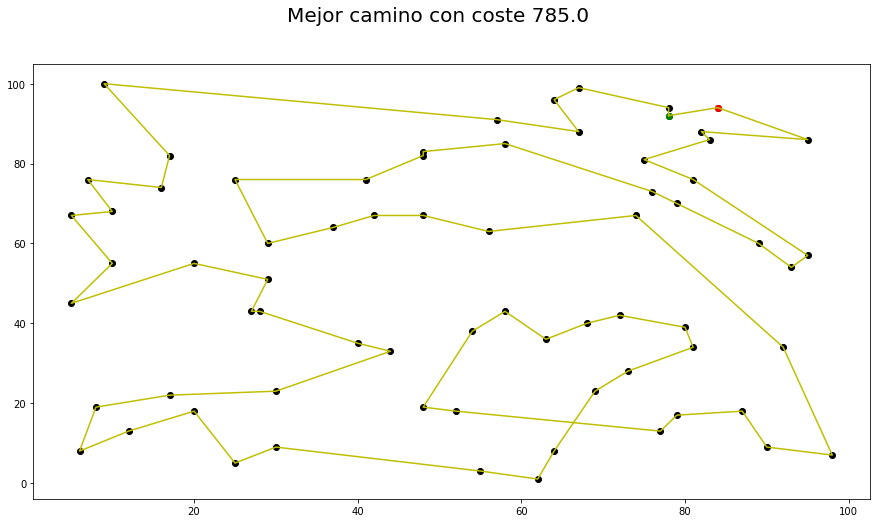

In [35]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.6
L = 50
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

# Búsqueda Tabú

In [36]:
# Greedy de la memoria de frecuencia eligiendo el menor
def greedyMenor(memoriaFrecuencias, n):
    memoriaTemporal = memoriaFrecuencias.copy()
    elegidos = []
    for i in range(0,n):
        provisional = np.where(memoriaTemporal[:][i] == np.amin(memoriaTemporal[:][i]))[0][0]
        elegidos.append(provisional)
        memoriaTemporal[: , provisional] = float('inf')
    
    return elegidos

In [37]:
# Algoritmo de búsqueda Tabú
def busquedaTabu(x, y, numVecinos, numIter, numReinici):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        n = len(x)
        tenenciaTabu = round(n / 2)
        listaTabu = deque(maxlen=tenenciaTabu)
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual
        # Inicializo memoria de frecuencias
        memoriaFrecuencias = np.zeros((len(x),len(y)))
        for i in range(0,n):
            memoriaFrecuencias[i, sActual[i]] += 1
        
        iteraciones = numIter * n
        reinicializacion = round(iteraciones / (numReinici + 1))
        iterador = 0
        for i in range(0,iteraciones):
            # Genero/Analizo Vecinos
            mejorVecino = []
            costeMejor = float("inf")
            for k in range(0,numVecinos):
                piv1 = random.randint(0,len(x) - 1)
                piv2 = random.randint(0,len(x) - 1)
                sCandidata = sActual.copy()
                sCandidata[piv1], sCandidata[piv2] = sCandidata[piv2], sCandidata[piv1]
                costeCandidata = calculaCosteVecino(costeActual, sActual, sCandidata, piv1, piv2)
                iterador += 1
                
                seEvalua = False
                if((piv1,piv2) in listaTabu) or ((piv2,piv1) in listaTabu):
                    #Prueba de aspiración
                    if(costeCandidata < costeBest):
                        seEvalua = True
                else:
                    seEvalua = True
                    
                if (seEvalua and costeCandidata < costeMejor):  
                    mejorVecino = sCandidata.copy()
                    costeMejor = costeCandidata
                    mejorPiv1 = piv1
                    mejorPiv2 = piv2

            # Actualización de variables
            sActual = mejorVecino.copy()
            costeActual = costeMejor
            if costeMejor < costeBest:
                sBest = mejorVecino.copy()
                costeBest = costeMejor        

            # Actualizo Memoria de Frecuencias
            for p in range(0,n):
                memoriaFrecuencias[p, sActual[p]] += 1

            # Actualizo lista tabú
            listaTabu.append((mejorPiv1, mejorPiv2))
            
            # Reinicializaciones
            if ((i + 1) % reinicializacion) == 0:
                rnd = random.random()
                if rnd < 0.25:
                    # Solucion Inicial Aleatoria
                    sActual = random.sample(range(n),n)
                    costeActual = calculaCoste(sActual)
                elif rnd < 0.75:
                    # Solucion Greedy
                    sActual = greedyMenor(memoriaFrecuencias,n)
                    costeActual = calculaCoste(sActual) 
                else:
                    # Solucion es la mejor hasta el momento
                    sActual = sBest.copy()
                    costeActual = costeBest

                # Nueva Tenencia Tabú
                rnd2 = random.uniform(0,1)
                if rnd2 < 0.5:
                    tenenciaTabu = round(tenenciaTabu / 2)
                else:
                    tenenciaTabu = tenenciaTabu + round(tenenciaTabu / 2) 

                listaTabu = deque([],maxlen=tenenciaTabu)
        
        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(iterador)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,931.0,112000.0,1.254384
1,1.0,1029.0,112000.0,1.307496
2,2.0,1018.0,112000.0,1.123528
3,3.0,923.0,112000.0,1.224639
4,4.0,1035.0,112000.0,1.131979
5,5.0,993.0,112000.0,1.062995
6,6.0,1001.0,112000.0,1.333698
7,7.0,969.0,112000.0,1.377208
8,8.0,945.0,112000.0,1.252634
9,9.0,967.0,112000.0,1.201353


Media coste:  981.1
Desviación típica coste:  40.32217476498233
Media numero de evaluaciones:  112000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  1.2269915103912354


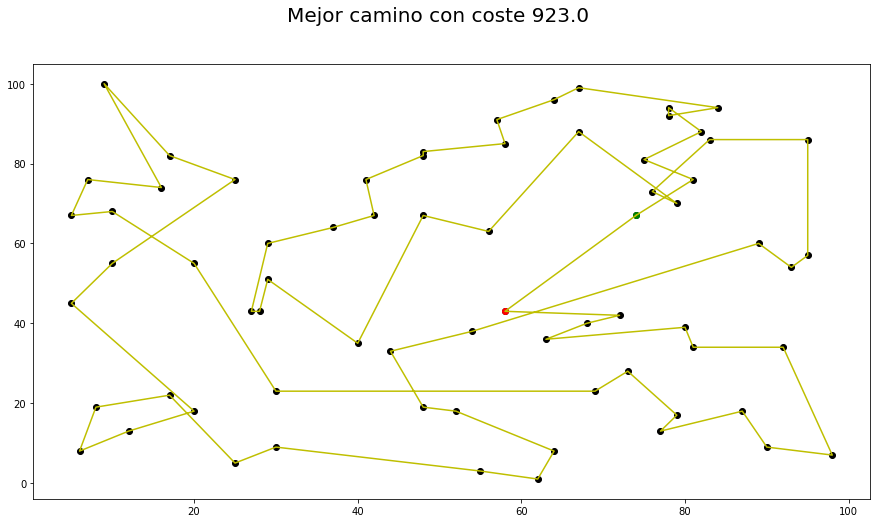

In [19]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,930.0,168000.0,2.067670
1,1.0,930.0,168000.0,1.568805
2,2.0,1009.0,168000.0,1.637587
3,3.0,969.0,168000.0,1.509005
4,4.0,907.0,168000.0,1.361507
5,5.0,928.0,168000.0,1.965912
6,6.0,999.0,168000.0,1.724483
7,7.0,970.0,168000.0,2.240280
8,8.0,1023.0,168000.0,1.971881
9,9.0,974.0,168000.0,1.430297


Media coste:  963.9
Desviación típica coste:  39.08523449533795
Media numero de evaluaciones:  168000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  1.7477426528930664


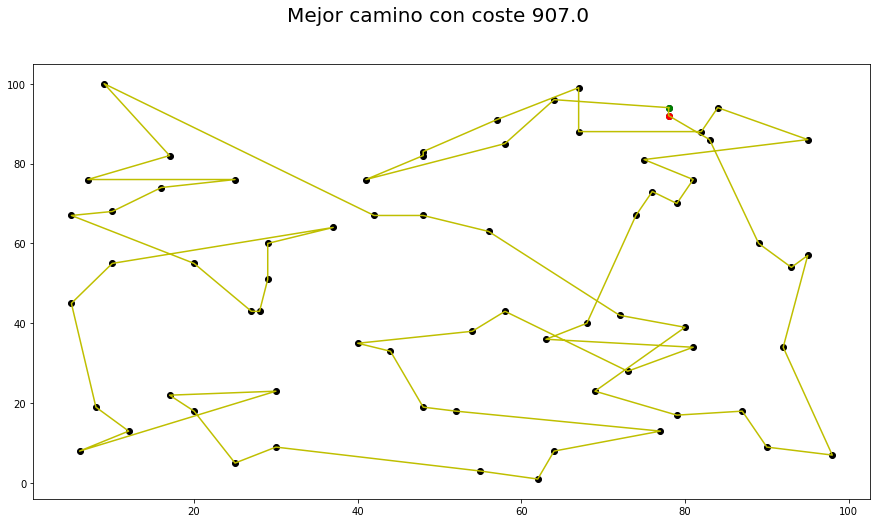

In [38]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 60
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,1134.0,112000.0,1.013324
1,1.0,1054.0,112000.0,0.982647
2,2.0,990.0,112000.0,1.198794
3,3.0,984.0,112000.0,1.124038
4,4.0,1340.0,112000.0,0.896613
5,5.0,982.0,112000.0,0.932506
6,6.0,1097.0,112000.0,0.914554
7,7.0,1095.0,112000.0,0.932517
8,8.0,1045.0,112000.0,1.085417
9,9.0,1073.0,112000.0,0.961699


Media coste:  1079.4
Desviación típica coste:  105.35463919543363
Media numero de evaluaciones:  112000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  1.0042111158370972


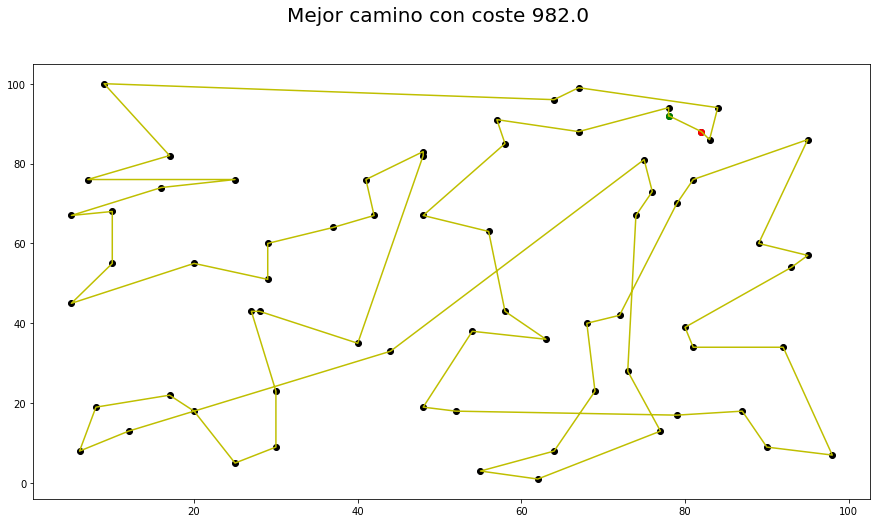

In [39]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 150
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,853.0,196000.0,1.998173
1,1.0,913.0,196000.0,2.020733
2,2.0,929.0,196000.0,1.707402
3,3.0,969.0,196000.0,2.126493
4,4.0,903.0,196000.0,1.653700
5,5.0,885.0,196000.0,2.318920
6,6.0,921.0,196000.0,1.974454
7,7.0,929.0,196000.0,1.840595
8,8.0,886.0,196000.0,1.917837
9,9.0,926.0,196000.0,1.778913


Media coste:  911.4
Desviación típica coste:  31.742715699826313
Media numero de evaluaciones:  196000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  1.9337220430374145


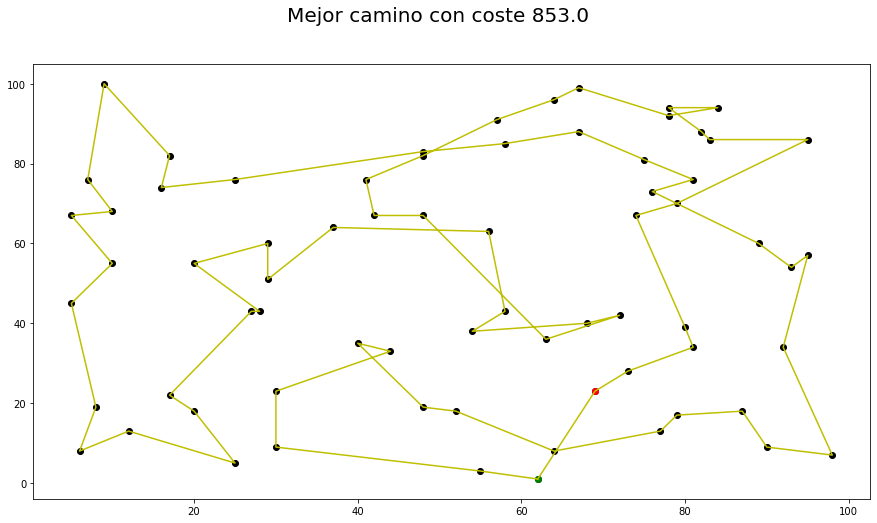

In [40]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 70
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,918.0,294000.0,3.003741
1,1.0,891.0,294000.0,3.252620
2,2.0,851.0,294000.0,2.886005
3,3.0,963.0,294000.0,3.497973
4,4.0,915.0,294000.0,3.095405
5,5.0,825.0,294000.0,2.676865
6,6.0,865.0,294000.0,2.975870
7,7.0,875.0,294000.0,3.181356
8,8.0,787.0,294000.0,2.569774
9,9.0,958.0,294000.0,2.615398


Media coste:  884.8
Desviación típica coste:  56.07296833392876
Media numero de evaluaciones:  294000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  2.9755006790161134


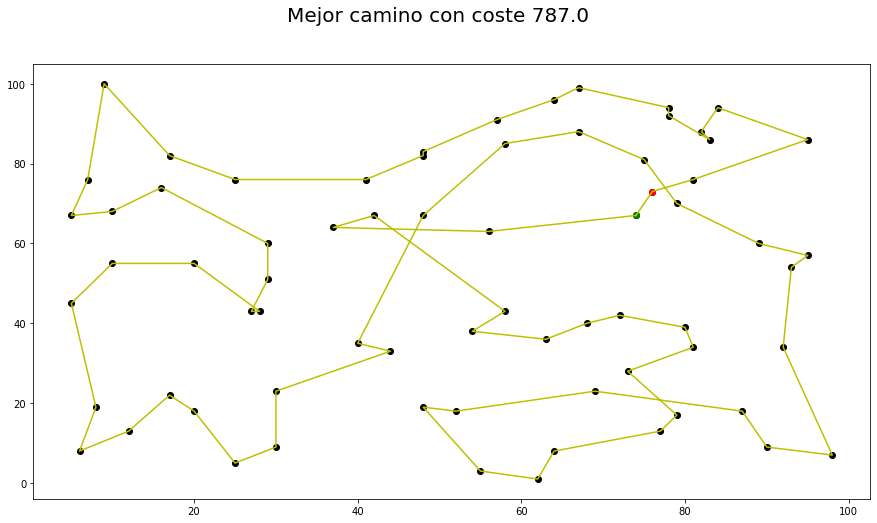

In [42]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 60
numReinici = 10
numVecinos = 70
busquedaTabu(x, y, numVecinos, numIter, numReinici)